# Problem Statement:
You work in XYZ Company as a Python. The company officials want you to write code for reducing the dimensions of a dataset
Tasks to be performed:
- Using load_digits function from sklearn import wines data
- Take a look at the shape of image data
- Import PCA, LDA and FactorAnalysis from Sklearn
- Project data in 2 D space using the PCA, LDA and FactorAnalysis algorithm form sklearn
- Take a look at the new data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import FactorAnalysis as FA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
# importing the dataset
digits = datasets.load_wine()

In [3]:
digits

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
digits.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
digits.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
for image, label in zip(digits.data[0:5], digits.target[0:5]):
    print(image)
    print(label)

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
0
[1.32e+01 1.78e+00 2.14e+00 1.12e+01 1.00e+02 2.65e+00 2.76e+00 2.60e-01
 1.28e+00 4.38e+00 1.05e+00 3.40e+00 1.05e+03]
0
[1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
 3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
0
[1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
 2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
0
[1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
 3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]
0


In [7]:
for i,j in enumerate(['ele1','ele2','ele3']):
    print(i)
    print(j)

0
ele1
1
ele2
2
ele3


ValueError: cannot reshape array of size 13 into shape (8,8)

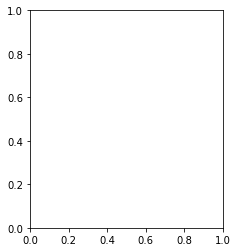

In [8]:
#Displaying some of the images and labels
#import numpy as np
#import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f"Training: {label}", fontsize=20 )  

In [13]:
#digits.data[0:5]

In [14]:
X = digits.data
y = digits.target

X.shape

(1797, 64)

In [15]:
y.shape

(1797,)

In [16]:
#splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [17]:
y_train

array([5, 9, 2, ..., 6, 9, 6])

In [18]:
#feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)



In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = rf.predict(X_test)
y_pred

array([5, 3, 2, 6, 2, 2, 7, 3, 0, 8, 7, 7, 5, 5, 8, 0, 4, 2, 0, 2, 1, 8,
       6, 1, 6, 7, 1, 1, 3, 1, 8, 2, 8, 3, 3, 7, 6, 5, 1, 4, 4, 6, 8, 6,
       6, 1, 4, 9, 5, 0, 9, 8, 7, 6, 0, 6, 8, 3, 4, 9, 4, 1, 9, 2, 3, 4,
       9, 5, 9, 0, 1, 2, 9, 7, 3, 9, 5, 7, 0, 2, 4, 3, 4, 4, 8, 0, 3, 7,
       4, 8, 1, 7, 3, 2, 5, 3, 8, 8, 6, 3, 5, 5, 6, 8, 2, 8, 6, 7, 9, 7,
       4, 6, 1, 1, 2, 6, 0, 6, 9, 7, 2, 8, 9, 1, 9, 1, 0, 0, 4, 5, 0, 4,
       9, 4, 5, 2, 3, 0, 9, 4, 2, 8, 4, 2, 7, 1, 9, 1, 1, 3, 5, 5, 5, 0,
       2, 3, 8, 3, 1, 8, 8, 5, 0, 5, 5, 4, 2, 4, 9, 6, 1, 0, 4, 1, 0, 0,
       8, 6, 0, 4, 8, 0, 0, 2, 4, 8, 2, 0, 3, 6, 5, 1, 3, 4, 4, 2, 8, 2,
       1, 4, 8, 6, 9, 9, 8, 9, 6, 1, 2, 3, 3, 6, 1, 4, 1, 0, 5, 7, 8, 9,
       9, 9, 6, 2, 3, 7, 5, 4, 0, 3, 6, 4, 5, 1, 8, 0, 8, 6, 2, 0, 1, 9,
       2, 1, 4, 1, 8, 9, 3, 5, 4, 8, 4, 4, 3, 9, 8, 8, 6, 4, 9, 7, 5, 4,
       9, 5, 2, 4, 3, 3, 5, 8, 3, 8, 3, 5, 9, 7, 5, 1, 0, 3, 2, 3, 7, 3,
       3, 0, 9, 3, 8, 0, 9, 8, 7, 6, 2, 6, 7, 1, 5,

In [21]:
y_test

array([5, 3, 2, 6, 2, 2, 7, 3, 0, 8, 7, 7, 5, 5, 8, 0, 4, 2, 0, 2, 1, 8,
       6, 1, 6, 7, 1, 1, 3, 1, 8, 2, 8, 3, 3, 7, 6, 5, 1, 4, 4, 6, 8, 6,
       6, 1, 4, 9, 5, 0, 9, 8, 7, 6, 0, 6, 8, 3, 4, 3, 4, 1, 9, 2, 3, 4,
       9, 5, 9, 0, 1, 2, 9, 7, 3, 9, 5, 7, 0, 2, 4, 3, 4, 4, 3, 0, 3, 7,
       4, 8, 1, 7, 3, 2, 5, 3, 8, 8, 6, 3, 5, 5, 6, 8, 2, 8, 6, 7, 9, 7,
       4, 6, 1, 1, 2, 6, 0, 6, 9, 7, 2, 5, 9, 1, 9, 1, 0, 0, 4, 5, 0, 4,
       9, 4, 5, 2, 3, 0, 9, 4, 2, 8, 4, 2, 7, 1, 9, 1, 1, 3, 5, 5, 5, 0,
       2, 3, 8, 3, 1, 8, 8, 5, 0, 5, 5, 4, 2, 4, 3, 6, 1, 0, 4, 1, 0, 0,
       8, 6, 0, 4, 8, 0, 0, 2, 4, 8, 2, 0, 3, 6, 5, 1, 3, 4, 4, 2, 8, 2,
       1, 4, 8, 6, 9, 9, 8, 9, 5, 8, 2, 3, 3, 6, 1, 4, 1, 0, 5, 7, 8, 9,
       9, 9, 6, 2, 3, 7, 5, 4, 0, 3, 6, 4, 5, 1, 8, 0, 8, 6, 2, 0, 1, 9,
       2, 1, 6, 1, 8, 9, 3, 5, 4, 8, 4, 4, 8, 9, 8, 8, 6, 4, 3, 7, 5, 4,
       9, 5, 2, 4, 3, 3, 5, 8, 3, 8, 3, 5, 9, 7, 5, 1, 0, 3, 2, 3, 7, 3,
       3, 0, 5, 3, 8, 0, 9, 8, 7, 6, 2, 6, 7, 1, 5,

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(y_test, y_pred)

In [23]:
acc

0.9666666666666667

In [24]:
print(confusion_matrix(y_test,y_pred))

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  3]
 [ 0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 35  1  0  1  1]
 [ 0  0  0  0  1  0 33  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0]
 [ 0  1  0  1  0  0  0  0 40  0]
 [ 0  0  0  1  0  0  0  0  0 27]]


# LDA

In [25]:
#LDA
lda = LinearDiscriminantAnalysis(n_components=9)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test) 
X_train.shape

(1437, 9)

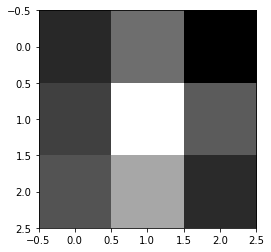

In [26]:
plt.imshow(np.reshape(X_train[1], (3,3)), cmap=plt.cm.gray)

In [27]:
X_train

array([[-0.26817836,  2.38445762, -0.85478075, ..., -0.35400743,
        -0.46040748,  0.06224327],
       [-0.93375203,  0.69151537, -1.8879891 , ...,  0.07044064,
         2.04126735, -0.8936843 ],
       [-4.69508194, -3.09413291,  1.6885823 , ...,  0.62528657,
        -0.31015128, -0.31123107],
       ...,
       [ 4.138023  , -2.11108426,  2.64799518, ..., -0.49374305,
         0.33872172,  0.02081878],
       [-3.46127737,  1.22408742, -0.87902174, ..., -0.47060545,
         0.28372556,  0.03812993],
       [ 3.55515742, -0.6198338 ,  2.49086808, ..., -0.63585108,
        -0.04334568,  0.01364586]])

In [28]:
#model Building 
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
#prediction
y_pred1 = rf1.predict(X_test)

In [30]:
y_pred1

array([5, 3, 2, 6, 2, 2, 7, 3, 0, 8, 7, 7, 5, 5, 8, 0, 4, 2, 0, 2, 1, 8,
       6, 1, 6, 7, 1, 1, 3, 1, 8, 2, 8, 3, 3, 7, 6, 5, 1, 4, 4, 6, 8, 6,
       6, 9, 4, 9, 9, 0, 9, 8, 7, 6, 0, 6, 8, 3, 4, 3, 8, 1, 9, 2, 3, 4,
       9, 5, 9, 0, 1, 2, 8, 7, 3, 9, 5, 7, 0, 2, 4, 3, 4, 4, 3, 0, 3, 7,
       4, 8, 1, 8, 3, 2, 5, 3, 8, 8, 6, 3, 5, 5, 6, 8, 2, 8, 6, 7, 9, 7,
       4, 6, 1, 1, 2, 6, 0, 6, 9, 7, 2, 3, 9, 1, 9, 1, 0, 0, 4, 5, 0, 4,
       9, 4, 5, 2, 3, 0, 9, 4, 2, 8, 4, 2, 7, 1, 9, 1, 1, 3, 5, 5, 5, 0,
       2, 3, 8, 3, 1, 8, 8, 5, 0, 5, 5, 4, 2, 4, 3, 6, 1, 0, 4, 1, 0, 0,
       8, 6, 0, 4, 8, 0, 0, 2, 4, 8, 2, 0, 3, 6, 5, 1, 3, 4, 4, 2, 1, 2,
       1, 4, 8, 6, 7, 9, 8, 9, 5, 1, 2, 3, 3, 6, 1, 4, 1, 0, 5, 7, 8, 9,
       9, 9, 6, 2, 3, 7, 5, 4, 0, 3, 6, 4, 5, 1, 8, 0, 8, 6, 2, 0, 9, 9,
       2, 1, 6, 1, 8, 9, 3, 5, 4, 8, 4, 4, 8, 9, 8, 8, 6, 4, 3, 7, 5, 4,
       9, 5, 2, 4, 9, 3, 5, 8, 3, 8, 3, 5, 9, 7, 5, 1, 0, 3, 2, 3, 7, 9,
       3, 0, 9, 3, 8, 0, 9, 8, 7, 6, 2, 6, 7, 1, 5,

In [31]:
y_test

array([5, 3, 2, 6, 2, 2, 7, 3, 0, 8, 7, 7, 5, 5, 8, 0, 4, 2, 0, 2, 1, 8,
       6, 1, 6, 7, 1, 1, 3, 1, 8, 2, 8, 3, 3, 7, 6, 5, 1, 4, 4, 6, 8, 6,
       6, 1, 4, 9, 5, 0, 9, 8, 7, 6, 0, 6, 8, 3, 4, 3, 4, 1, 9, 2, 3, 4,
       9, 5, 9, 0, 1, 2, 9, 7, 3, 9, 5, 7, 0, 2, 4, 3, 4, 4, 3, 0, 3, 7,
       4, 8, 1, 7, 3, 2, 5, 3, 8, 8, 6, 3, 5, 5, 6, 8, 2, 8, 6, 7, 9, 7,
       4, 6, 1, 1, 2, 6, 0, 6, 9, 7, 2, 5, 9, 1, 9, 1, 0, 0, 4, 5, 0, 4,
       9, 4, 5, 2, 3, 0, 9, 4, 2, 8, 4, 2, 7, 1, 9, 1, 1, 3, 5, 5, 5, 0,
       2, 3, 8, 3, 1, 8, 8, 5, 0, 5, 5, 4, 2, 4, 3, 6, 1, 0, 4, 1, 0, 0,
       8, 6, 0, 4, 8, 0, 0, 2, 4, 8, 2, 0, 3, 6, 5, 1, 3, 4, 4, 2, 8, 2,
       1, 4, 8, 6, 9, 9, 8, 9, 5, 8, 2, 3, 3, 6, 1, 4, 1, 0, 5, 7, 8, 9,
       9, 9, 6, 2, 3, 7, 5, 4, 0, 3, 6, 4, 5, 1, 8, 0, 8, 6, 2, 0, 1, 9,
       2, 1, 6, 1, 8, 9, 3, 5, 4, 8, 4, 4, 8, 9, 8, 8, 6, 4, 3, 7, 5, 4,
       9, 5, 2, 4, 3, 3, 5, 8, 3, 8, 3, 5, 9, 7, 5, 1, 0, 3, 2, 3, 7, 3,
       3, 0, 5, 3, 8, 0, 9, 8, 7, 6, 2, 6, 7, 1, 5,

In [32]:
#accuracy Score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(y_test, y_pred1)
cf = confusion_matrix(y_test, y_pred1)
clrep = classification_report(y_test, y_pred1)

In [33]:
print(acc)

0.9555555555555556


In [34]:
cf

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  1,  0,  0,  0,  0,  2],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  0, 35,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 24,  1,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 26]], dtype=int64)

In [35]:
'''
         0    1   2   3   4   5   6   7   8   9
   0    [32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
    1   [ 0, 27,  1,  0,  0,  0,  0,  0,  0,  0],
    2   [ 0,  0, 31,  2,  0,  0,  0,  0,  0,  0],
    3   [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
    4   [ 0,  0,  0,  0, 45,  0,  0,  1,  0,  0],
    5   [ 0,  0,  0,  0,  0, 46,  0,  0,  1,  0],
    6   [ 0,  0,  0,  0,  1,  0, 34,  0,  0,  0],
    7   [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
    8   [ 0,  2,  0,  0,  0,  0,  0,  0, 27,  1],
    9   [ 0,  0,  0,  1,  1,  0,  0,  0,  1, 37]
'''

'\n         0    1   2   3   4   5   6   7   8   9\n   0    [32,  0,  0,  0,  1,  0,  0,  0,  0,  0],\n    1   [ 0, 27,  1,  0,  0,  0,  0,  0,  0,  0],\n    2   [ 0,  0, 31,  2,  0,  0,  0,  0,  0,  0],\n    3   [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],\n    4   [ 0,  0,  0,  0, 45,  0,  0,  1,  0,  0],\n    5   [ 0,  0,  0,  0,  0, 46,  0,  0,  1,  0],\n    6   [ 0,  0,  0,  0,  1,  0, 34,  0,  0,  0],\n    7   [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],\n    8   [ 0,  2,  0,  0,  0,  0,  0,  0, 27,  1],\n    9   [ 0,  0,  0,  1,  1,  0,  0,  0,  1, 37]\n'

In [36]:
print(clrep)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.94      0.92      0.93        37
           2       1.00      1.00      1.00        32
           3       0.98      0.94      0.96        47
           4       0.95      0.97      0.96        39
           5       1.00      0.92      0.96        38
           6       1.00      1.00      1.00        34
           7       0.96      0.96      0.96        25
           8       0.91      0.95      0.93        42
           9       0.81      0.93      0.87        28

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



<AxesSubplot:>

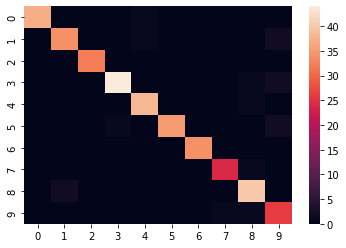

In [37]:
import seaborn as sns
sns.heatmap(cf)

In [38]:
y_test

array([5, 3, 2, 6, 2, 2, 7, 3, 0, 8, 7, 7, 5, 5, 8, 0, 4, 2, 0, 2, 1, 8,
       6, 1, 6, 7, 1, 1, 3, 1, 8, 2, 8, 3, 3, 7, 6, 5, 1, 4, 4, 6, 8, 6,
       6, 1, 4, 9, 5, 0, 9, 8, 7, 6, 0, 6, 8, 3, 4, 3, 4, 1, 9, 2, 3, 4,
       9, 5, 9, 0, 1, 2, 9, 7, 3, 9, 5, 7, 0, 2, 4, 3, 4, 4, 3, 0, 3, 7,
       4, 8, 1, 7, 3, 2, 5, 3, 8, 8, 6, 3, 5, 5, 6, 8, 2, 8, 6, 7, 9, 7,
       4, 6, 1, 1, 2, 6, 0, 6, 9, 7, 2, 5, 9, 1, 9, 1, 0, 0, 4, 5, 0, 4,
       9, 4, 5, 2, 3, 0, 9, 4, 2, 8, 4, 2, 7, 1, 9, 1, 1, 3, 5, 5, 5, 0,
       2, 3, 8, 3, 1, 8, 8, 5, 0, 5, 5, 4, 2, 4, 3, 6, 1, 0, 4, 1, 0, 0,
       8, 6, 0, 4, 8, 0, 0, 2, 4, 8, 2, 0, 3, 6, 5, 1, 3, 4, 4, 2, 8, 2,
       1, 4, 8, 6, 9, 9, 8, 9, 5, 8, 2, 3, 3, 6, 1, 4, 1, 0, 5, 7, 8, 9,
       9, 9, 6, 2, 3, 7, 5, 4, 0, 3, 6, 4, 5, 1, 8, 0, 8, 6, 2, 0, 1, 9,
       2, 1, 6, 1, 8, 9, 3, 5, 4, 8, 4, 4, 8, 9, 8, 8, 6, 4, 3, 7, 5, 4,
       9, 5, 2, 4, 3, 3, 5, 8, 3, 8, 3, 5, 9, 7, 5, 1, 0, 3, 2, 3, 7, 3,
       3, 0, 5, 3, 8, 0, 9, 8, 7, 6, 2, 6, 7, 1, 5,

In [39]:
y_pred1

array([5, 3, 2, 6, 2, 2, 7, 3, 0, 8, 7, 7, 5, 5, 8, 0, 4, 2, 0, 2, 1, 8,
       6, 1, 6, 7, 1, 1, 3, 1, 8, 2, 8, 3, 3, 7, 6, 5, 1, 4, 4, 6, 8, 6,
       6, 9, 4, 9, 9, 0, 9, 8, 7, 6, 0, 6, 8, 3, 4, 3, 8, 1, 9, 2, 3, 4,
       9, 5, 9, 0, 1, 2, 8, 7, 3, 9, 5, 7, 0, 2, 4, 3, 4, 4, 3, 0, 3, 7,
       4, 8, 1, 8, 3, 2, 5, 3, 8, 8, 6, 3, 5, 5, 6, 8, 2, 8, 6, 7, 9, 7,
       4, 6, 1, 1, 2, 6, 0, 6, 9, 7, 2, 3, 9, 1, 9, 1, 0, 0, 4, 5, 0, 4,
       9, 4, 5, 2, 3, 0, 9, 4, 2, 8, 4, 2, 7, 1, 9, 1, 1, 3, 5, 5, 5, 0,
       2, 3, 8, 3, 1, 8, 8, 5, 0, 5, 5, 4, 2, 4, 3, 6, 1, 0, 4, 1, 0, 0,
       8, 6, 0, 4, 8, 0, 0, 2, 4, 8, 2, 0, 3, 6, 5, 1, 3, 4, 4, 2, 1, 2,
       1, 4, 8, 6, 7, 9, 8, 9, 5, 1, 2, 3, 3, 6, 1, 4, 1, 0, 5, 7, 8, 9,
       9, 9, 6, 2, 3, 7, 5, 4, 0, 3, 6, 4, 5, 1, 8, 0, 8, 6, 2, 0, 9, 9,
       2, 1, 6, 1, 8, 9, 3, 5, 4, 8, 4, 4, 8, 9, 8, 8, 6, 4, 3, 7, 5, 4,
       9, 5, 2, 4, 9, 3, 5, 8, 3, 8, 3, 5, 9, 7, 5, 1, 0, 3, 2, 3, 7, 9,
       3, 0, 9, 3, 8, 0, 9, 8, 7, 6, 2, 6, 7, 1, 5,

In [40]:
def get_misclassified_index(y_pred,y_test):
    misclassification=[]#help us out to get the misclassified index value
    for index,(predicted,actual) in enumerate(zip(y_pred,y_test)):
        if predicted!=actual:
            misclassification.append(index)
            
    return misclassification

In [41]:
misclassification = get_misclassified_index(y_pred1,y_test)

In [42]:
misclassification

[45, 48, 60, 72, 91, 121, 196, 202, 207, 240, 268, 285, 288, 326, 347, 358]

In [43]:
def plot_misclassifications(misclassification):
    plt.figure(figsize=(20,4))
    for index,wrong in enumerate(misclassification[0:5]):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(X_test[wrong],(3,3)),cmap=plt.cm.gray)
        plt.title("Predicted:{} Actual:{}".format(y_pred1[wrong],y_test[wrong]))

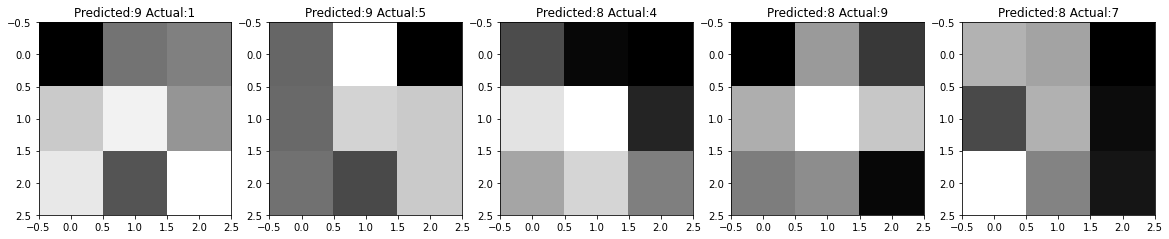

In [44]:
plot_misclassifications(misclassification)

# PCA

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)


In [49]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [55]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [58]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.20494543e-01, 9.94077696e-02, 8.59242439e-02, 6.77024462e-02,
       4.97893655e-02, 4.31000381e-02, 4.07911289e-02, 3.37404692e-02,
       3.05679142e-02, 2.96542487e-02, 2.71088226e-02, 2.61728281e-02,
       2.32446539e-02, 2.25724583e-02, 2.13676417e-02, 1.90543129e-02,
       1.75483153e-02, 1.62511331e-02, 1.51436943e-02, 1.40154458e-02,
       1.30069319e-02, 1.18898252e-02, 1.06354269e-02, 9.71819340e-03,
       9.56450701e-03, 9.12389209e-03, 8.47909821e-03, 8.24605065e-03,
       7.48008340e-03, 7.31162934e-03, 6.95565581e-03, 6.66244377e-03,
       6.34985070e-03, 5.95571224e-03, 5.82194387e-03, 5.55115749e-03,
       4.85613344e-03, 4.52711385e-03, 4.44482525e-03, 4.10822013e-03,
       3.92723707e-03, 3.67672759e-03, 3.51441157e-03, 3.28366707e-03,
       3.18956946e-03, 2.95885580e-03, 2.80278809e-03, 2.59113417e-03,
       2.40150348e-03, 2.22336917e-03, 1.98592314e-03, 1.97914148e-03,
       1.86154643e-03, 1.70530497e-03, 1.64338128e-03, 1.44872459e-03,
      

In [61]:
def perfrom_pca(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    pca = PCA(n_components=n)
    pca_x_train = pca.fit_transform(X_train)
    pca_x_test = pca.transform(X_test)
    classifier = RandomForestClassifier(max_depth=2, random_state=0)
    classifier.fit(pca_x_train, y_train)
    y_pred = classifier.predict(pca_x_test)
    cm = confusion_matrix(y_test, y_pred)
    print(x)
    print('Accuracy {0}\n\n'.format(accuracy_score(y_test, y_pred)))

In [62]:
for x in range(1,64): perfrom_pca(x)

1
Accuracy 0.30277777777777776


2
Accuracy 0.4638888888888889


3
Accuracy 0.5194444444444445


4
Accuracy 0.49166666666666664


5
Accuracy 0.6027777777777777


6
Accuracy 0.5888888888888889


7
Accuracy 0.6055555555555555


8
Accuracy 0.6388888888888888


9
Accuracy 0.6


10
Accuracy 0.6333333333333333


11
Accuracy 0.725


12
Accuracy 0.7388888888888889


13
Accuracy 0.7583333333333333


14
Accuracy 0.7444444444444445


15
Accuracy 0.7138888888888889


16
Accuracy 0.75


17
Accuracy 0.7416666666666667


18
Accuracy 0.7361111111111112


19
Accuracy 0.7611111111111111


20
Accuracy 0.775


21
Accuracy 0.7583333333333333


22
Accuracy 0.7833333333333333


23
Accuracy 0.7555555555555555


24
Accuracy 0.7833333333333333


25
Accuracy 0.7444444444444445


26
Accuracy 0.7916666666666666


27
Accuracy 0.7888888888888889


28
Accuracy 0.7833333333333333


29
Accuracy 0.7638888888888888


30
Accuracy 0.7972222222222223


31
Accuracy 0.7555555555555555


32
Accuracy 0.7527777777777778


33
Acc

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
pca = PCA(n_components=13)
pca_x_train = pca.fit_transform(X_train)
pca_x_test = pca.transform(X_test)
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(pca_x_train, y_train)
y_pred = classifier.predict(pca_x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy {0}\n\n'.format(accuracy_score(y_test, y_pred)))

[[25  0  0  1  0  0  0  1  0  0]
 [ 0 19  7  1  2  2  4  0  0  0]
 [ 0  0 28  5  0  0  0  2  0  1]
 [ 0  0  3 25  0  0  0  0  0  1]
 [ 0  0  0  0 28  0  0  2  0  0]
 [ 1  1  1  1  0 32  0  3  1  0]
 [ 0  0  0  0  3  0 40  0  0  1]
 [ 0  0  0  2  1  0  0 35  0  1]
 [ 0  2  5  9  0  0  0  5 17  1]
 [ 0  0  1 11  0  4  0  1  0 24]]
Accuracy 0.7583333333333333




In [65]:
pca_x_train

array([[ 23.37875558,   4.96621557,  18.36832775, ...,  -5.41466457,
          3.47570237,   1.28575779],
       [-15.21541983,  15.48612664,   6.70861474, ...,   1.78204495,
         -1.6216954 ,   3.60597476],
       [-21.04423221,   4.89826529, -21.09532946, ...,   3.62469876,
          4.93796934,   1.67735967],
       ...,
       [  3.47672733, -18.65116331,  -0.86309567, ...,  -0.47941171,
         -1.13945052,   1.73933558],
       [  3.21484629, -15.29049426, -15.56784962, ...,  -2.98544536,
          2.36410857,   0.3877457 ],
       [ -4.29187482,  -2.59967359,   7.88537348, ...,   1.74057626,
        -14.36362474,  -3.38905163]])

In [66]:
y_test

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 8, 7, 0, 6, 1, 5, 9, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 5, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [68]:
y_pred

array([2, 8, 2, 6, 6, 7, 1, 3, 2, 5, 2, 7, 6, 6, 6, 6, 1, 0, 5, 7, 8, 7,
       2, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 2, 4, 0, 1, 1, 6, 7, 7,
       2, 0, 3, 4, 2, 1, 9, 6, 7, 3, 0, 0, 1, 2, 6, 3, 0, 2, 3, 4, 2, 9,
       7, 4, 9, 1, 8, 3, 7, 1, 2, 3, 2, 9, 3, 7, 2, 3, 6, 0, 7, 3, 7, 2,
       5, 2, 9, 5, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 3, 5, 3, 0, 7, 2, 4, 3,
       3, 4, 8, 9, 7, 7, 8, 3, 9, 5, 2, 5, 3, 4, 2, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 3, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 6, 5, 9, 3, 1, 5, 3,
       6, 1, 7, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 9, 9, 3, 6, 3, 7, 7, 1, 6,
       3, 3, 6, 7, 4, 3, 6, 3, 0, 9, 3, 3, 0, 4, 7, 5, 7, 8, 0, 7, 2, 9,
       6, 4, 5, 0, 2, 4, 6, 4, 3, 3, 0, 9, 5, 2, 3, 1, 4, 7, 5, 4, 8, 3,
       2, 4, 9, 2, 7, 6, 2, 3, 2, 4, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 6,
       3, 7, 2, 7, 1, 5, 5, 7, 5, 2, 3, 7, 2, 7, 0, 5, 7, 0, 9, 1, 6, 5,
       3, 9, 4, 3, 3, 0, 3, 6, 4, 6, 3, 3, 6, 8, 8, 7, 4, 6, 7, 5, 2, 4,
       8, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 3, 0,

In [69]:
clrep = classification_report(y_test, y_pred)

In [70]:
print(clrep)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.86      0.54      0.67        35
           2       0.62      0.78      0.69        36
           3       0.45      0.86      0.60        29
           4       0.82      0.93      0.87        30
           5       0.84      0.80      0.82        40
           6       0.91      0.91      0.91        44
           7       0.71      0.90      0.80        39
           8       0.94      0.44      0.60        39
           9       0.83      0.59      0.69        41

    accuracy                           0.76       360
   macro avg       0.80      0.77      0.76       360
weighted avg       0.80      0.76      0.76       360



# FA

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [82]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [83]:
fa = FA()
fa_x_train = fa.fit_transform(X_train)
fa_x_test = fa.transform(X_test)
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(fa_x_train, y_train)
y_pred = classifier.predict(fa_x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy {0}\n\n'.format(accuracy_score(y_test, y_pred)))

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 30  1  0  1  0  2  0  1  2]
 [ 0  0 21  2  2  1  0  6  0  0]
 [ 0  0  4 24  0  2  1  3  0 13]
 [ 0  0  0  0 36  0  0  2  1  0]
 [ 0  0  0  0  0 32  1  0  0  5]
 [ 1  2  0  0  1  1 29  0  0  0]
 [ 0  0  0  0  1  0  0 22  0  2]
 [ 2 10  1  2  2  4  1  0 20  0]
 [ 0  2  0  0  2  1  1  1  0 21]]
Accuracy 0.7555555555555555




In [84]:
fa_x_train


array([[-0.09243358, -0.20955981, -0.95722698, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.5534053 ,  1.50507353, -0.0182733 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.81486704, -0.37587722,  0.74222906, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.19313235, -1.34636429,  0.69695574, ...,  0.        ,
         0.        ,  0.        ],
       [-0.71157671,  0.0774819 , -0.57494569, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37535447, -1.67897419, -0.27031506, ...,  0.        ,
         0.        ,  0.        ]])

In [85]:
y_test

array([5, 3, 2, 6, 2, 2, 7, 3, 0, 8, 7, 7, 5, 5, 8, 0, 4, 2, 0, 2, 1, 8,
       6, 1, 6, 7, 1, 1, 3, 1, 8, 2, 8, 3, 3, 7, 6, 5, 1, 4, 4, 6, 8, 6,
       6, 1, 4, 9, 5, 0, 9, 8, 7, 6, 0, 6, 8, 3, 4, 3, 4, 1, 9, 2, 3, 4,
       9, 5, 9, 0, 1, 2, 9, 7, 3, 9, 5, 7, 0, 2, 4, 3, 4, 4, 3, 0, 3, 7,
       4, 8, 1, 7, 3, 2, 5, 3, 8, 8, 6, 3, 5, 5, 6, 8, 2, 8, 6, 7, 9, 7,
       4, 6, 1, 1, 2, 6, 0, 6, 9, 7, 2, 5, 9, 1, 9, 1, 0, 0, 4, 5, 0, 4,
       9, 4, 5, 2, 3, 0, 9, 4, 2, 8, 4, 2, 7, 1, 9, 1, 1, 3, 5, 5, 5, 0,
       2, 3, 8, 3, 1, 8, 8, 5, 0, 5, 5, 4, 2, 4, 3, 6, 1, 0, 4, 1, 0, 0,
       8, 6, 0, 4, 8, 0, 0, 2, 4, 8, 2, 0, 3, 6, 5, 1, 3, 4, 4, 2, 8, 2,
       1, 4, 8, 6, 9, 9, 8, 9, 5, 8, 2, 3, 3, 6, 1, 4, 1, 0, 5, 7, 8, 9,
       9, 9, 6, 2, 3, 7, 5, 4, 0, 3, 6, 4, 5, 1, 8, 0, 8, 6, 2, 0, 1, 9,
       2, 1, 6, 1, 8, 9, 3, 5, 4, 8, 4, 4, 8, 9, 8, 8, 6, 4, 3, 7, 5, 4,
       9, 5, 2, 4, 3, 3, 5, 8, 3, 8, 3, 5, 9, 7, 5, 1, 0, 3, 2, 3, 7, 3,
       3, 0, 5, 3, 8, 0, 9, 8, 7, 6, 2, 6, 7, 1, 5,

In [86]:
y_pred

array([5, 3, 2, 6, 2, 7, 7, 3, 0, 1, 7, 9, 5, 5, 5, 0, 4, 2, 0, 2, 1, 1,
       5, 8, 6, 7, 1, 1, 9, 1, 8, 3, 1, 3, 7, 7, 6, 5, 1, 4, 4, 6, 8, 6,
       6, 9, 4, 9, 5, 0, 9, 1, 7, 6, 0, 1, 1, 3, 4, 7, 8, 1, 9, 2, 3, 4,
       9, 5, 6, 0, 1, 2, 5, 7, 3, 9, 9, 7, 0, 7, 4, 3, 7, 4, 5, 0, 9, 7,
       4, 3, 2, 7, 9, 2, 5, 3, 8, 4, 6, 3, 5, 5, 6, 4, 2, 8, 0, 9, 9, 7,
       4, 6, 1, 1, 2, 6, 0, 6, 1, 7, 2, 9, 9, 1, 1, 1, 0, 0, 4, 5, 0, 4,
       9, 4, 5, 2, 9, 0, 9, 4, 5, 8, 4, 4, 7, 1, 9, 1, 6, 3, 5, 5, 5, 0,
       2, 3, 8, 3, 1, 8, 8, 5, 0, 9, 5, 4, 2, 4, 7, 6, 1, 0, 4, 1, 0, 0,
       5, 6, 0, 4, 8, 0, 0, 7, 4, 0, 2, 0, 3, 6, 5, 1, 3, 7, 4, 2, 1, 2,
       6, 4, 8, 6, 4, 9, 1, 9, 5, 1, 2, 3, 9, 1, 1, 4, 1, 0, 5, 7, 3, 4,
       9, 9, 6, 2, 9, 7, 5, 4, 0, 9, 6, 4, 5, 1, 8, 0, 8, 6, 7, 0, 1, 9,
       7, 1, 4, 1, 8, 9, 9, 6, 4, 8, 4, 4, 1, 9, 8, 2, 6, 4, 9, 7, 5, 4,
       7, 5, 2, 4, 2, 9, 5, 8, 3, 8, 3, 5, 9, 7, 5, 1, 0, 2, 2, 3, 7, 5,
       3, 0, 9, 9, 1, 0, 9, 8, 7, 6, 4, 6, 7, 4, 5,

In [87]:
clrep = classification_report(y_test, y_pred)
print(clrep)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.68      0.81      0.74        37
           2       0.78      0.66      0.71        32
           3       0.86      0.51      0.64        47
           4       0.78      0.92      0.85        39
           5       0.78      0.84      0.81        38
           6       0.83      0.85      0.84        34
           7       0.65      0.88      0.75        25
           8       0.91      0.48      0.62        42
           9       0.49      0.75      0.59        28

    accuracy                           0.76       360
   macro avg       0.77      0.77      0.75       360
weighted avg       0.78      0.76      0.75       360

